**Importing basic libraries**

In [297]:
import numpy as np 
import pandas as pd 
import io
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from xgboost import XGBRegressor

In [224]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [245]:

path = "/content/drive/MyDrive/ML FILES/TRAINING.csv"

!ls "/content/drive/MyDrive/ML FILES/TRAINING.csv"

'/content/drive/MyDrive/ML FILES/TRAINING.csv'


**Loading data and viewing it**

**After viewing in excel file the data was misaligned and miss matched i have manually performed deleting extra column and rearranging data as per column**

In [246]:
train = "/content/drive/MyDrive/TRAINING.csv"
df = pd.read_csv(train , header = 0, error_bad_lines=False, index_col=False)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,15,21,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Item Code,State,Date,Item Description,ERP Size,Wall/Floor,Sticker Body Type,Value,Item Classification,Item Cat. Code,Quality Code,Customer code,Customer type,Sales Type,Sales Type.1,MRP / box,MRP / sqm,AD1/Sqm,AD2/Sqm,AD3/Sqm,AD4/Sqm,AD5/Sqm,AD6/Sqm,AD7/Sqm,Total AD /sqm,Billing rate/sqm,Buyer Rate/sqm,Ship to city,FY,Category,Review zone,Category 2,Re territory
0,C025506652701860361M,Assam,06/08/18,600X600 PGVT Botticino Classico 4 Pcs Prem,600X600,Floor,Vitrified,174096,S0660551+AF8-1,M001,1.0,C101103004812120,Guwahati,DEALER,Retail,1380,958.33,25.0,5.0,5.0,0.0,0,0,0,35,403.0,438.0,Guwahati,2018+AC0-19,HVP,East,GVT,N.EAST
1,C025506661491859361M,Assam,06/08/18,600X600 PGVT Botticino Classico 4 Pcs Prem,600X600,Floor,Vitrified,174096,S0660551+AF8-1,M001,1.0,C101103004812120,Guwahati,DEALER,Retail,1380,958.33,25.0,5.0,5.0,0.0,0,0,0,35,403.0,438.0,Guwahati,2018+AC0-19,HVP,East,GVT,N.EAST
2,C025506665870335361M,Assam,06/08/18,600X600 PGVT Carara Elegance 4 Pcs Prem,600X600,Floor,Vitrified,174096,S0660551+AF8-1,M001,1.0,C101103004812120,Guwahati,DEALER,Retail,1380,958.33,25.0,5.0,5.0,0.0,0,0,0,35,403.0,438.0,Guwahati,2018+AC0-19,HVP,East,GVT,N.EAST
3,C025506652720553361M,Assam,06/08/18,600X600 PGVT Hamley Grey 4 Pcs Prem,600X600,Floor,Vitrified,162489.6,S0660551+AF8-1,M001,1.0,C101103004812120,Guwahati,DEALER,Retail,1380,958.33,25.0,5.0,5.0,0.0,0,0,0,35,403.0,438.0,Guwahati,2018+AC0-19,HVP,East,GVT,N.EAST
4,C025506661491859361M,Bihar,06/08/18,600X600 PGVT Onyx Verde 4 Pcs Prem,600X600,Floor,Vitrified,97493.76,S0660551+AF8-1,M001,1.0,C101104007609151,Samastipur,DEALER,Retail,1190,826.39,25.0,5.0,5.0,0.0,0,0,0,35,403.0,438.0,Samastipur,2018+AC0-19,HVP,East,GVT,PATNA


**Describing Columns and there DataType**

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17499 entries, 0 to 17498
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item Code            17498 non-null  object 
 1   State                17498 non-null  object 
 2   Date                 17498 non-null  object 
 3   Item Description     17499 non-null  object 
 4   ERP Size             17498 non-null  object 
 5   Wall/Floor           17498 non-null  object 
 6   Sticker Body Type    17498 non-null  object 
 7   Value                17498 non-null  object 
 8   Item Classification  17498 non-null  object 
 9   Item Cat. Code       17498 non-null  object 
 10  Quality Code         17498 non-null  float64
 11  Customer code        17498 non-null  object 
 12  Customer type        17498 non-null  object 
 13  Sales Type           17498 non-null  object 
 14  Sales Type.1         17498 non-null  object 
 15  MRP / box            17498 non-null 

In [248]:
df.describe()


,Quality Code,MRP / sqm,AD1/Sqm,AD2/Sqm,AD3/Sqm,AD4/Sqm,Billing rate/sqm,Buyer Rate/sqm
count,17498.0,17498.000000,17498.000000,17498.000000,17498.000000,17458.000000,17484.000000,17484.000000
mean,1.0,587.984368,25.243618,4.355258,3.922963,3.180331,304.003228,339.317891
std,0.0,243.771318,18.909086,1.855866,2.049484,27.207916,118.982654,128.117988
min,1.0,358.020000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000
25%,1.0,469.140000,25.000000,5.000000,5.000000,0.000000,238.000000,273.000000
50%,1.0,546.300000,25.000000,5.000000,5.000000,0.000000,261.000000,296.000000
75%,1.0,611.110000,25.000000,5.000000,5.000000,0.000000,325.000000,360.000000
max,1.0,4138.890000,583.330000,25.000000,5.000000,877.500000,2165.000000,2200.000000


**Exploratory Data Analysis And Preprocessing**


**Converting Object to Float**

In [249]:

df['AD5/Sqm'] = pd.to_numeric(df['AD5/Sqm'],errors = 'coerce')
df['AD6/Sqm'] = pd.to_numeric(df['AD5/Sqm'],errors = 'coerce')
df['AD7/Sqm'] = pd.to_numeric(df['AD5/Sqm'],errors = 'coerce')
df['Total AD /sqm'] = pd.to_numeric(df['Total AD /sqm'],errors = 'coerce')

In [253]:
#converting date time object
df["Date"] = pd.to_datetime(df["Date"])
df["month"] = df["Date"].dt.month
df.drop(["Date"], axis = 1, inplace = True)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17499 entries, 0 to 17498
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item Code            17498 non-null  object 
 1   State                17498 non-null  object 
 2   Item Description     17499 non-null  object 
 3   ERP Size             17498 non-null  object 
 4   Wall/Floor           17498 non-null  object 
 5   Sticker Body Type    17498 non-null  object 
 6   Value                17498 non-null  object 
 7   Item Classification  17498 non-null  object 
 8   Item Cat. Code       17498 non-null  object 
 9   Quality Code         17498 non-null  float64
 10  Customer code        17498 non-null  object 
 11  Customer type        17498 non-null  object 
 12  Sales Type           17498 non-null  object 
 13  Sales Type.1         17498 non-null  object 
 14  MRP / box            17498 non-null  object 
 15  MRP / sqm            17498 non-null 

**Dropping Missing Value**

In [257]:
 df.isnull().sum()

Item Code               1
State                   1
Item Description        0
ERP Size                1
Wall/Floor              1
Sticker Body Type       1
Value                   1
Item Classification     1
Item Cat. Code          1
Quality Code            1
Customer code           1
Customer type           1
Sales Type              1
Sales Type.1            1
MRP / box               1
MRP / sqm               1
AD1/Sqm                 1
AD2/Sqm                 1
AD3/Sqm                 1
AD4/Sqm                41
AD5/Sqm                54
AD6/Sqm                54
AD7/Sqm                54
Total AD /sqm          15
Billing rate/sqm       15
Buyer Rate/sqm         15
Ship to city           57
FY                      1
Category                1
Review zone             1
Category 2              1
 Re territory           1
month                   1
dtype: int64

**Checking the results**

In [258]:
df.dropna(inplace=True)

In [259]:
 df.isnull().sum()
 

Item Code              0
State                  0
Item Description       0
ERP Size               0
Wall/Floor             0
Sticker Body Type      0
Value                  0
Item Classification    0
Item Cat. Code         0
Quality Code           0
Customer code          0
Customer type          0
Sales Type             0
Sales Type.1           0
MRP / box              0
MRP / sqm              0
AD1/Sqm                0
AD2/Sqm                0
AD3/Sqm                0
AD4/Sqm                0
AD5/Sqm                0
AD6/Sqm                0
AD7/Sqm                0
Total AD /sqm          0
Billing rate/sqm       0
Buyer Rate/sqm         0
Ship to city           0
FY                     0
Category               0
Review zone            0
Category 2             0
 Re territory          0
month                  0
dtype: int64

**Seprating Categorical and Numerical Variables**

In [260]:
df_categorical=[]
df_numerical=[]

for x in df:
    if df[x].dtypes=="object":
        df_categorical.append(x)
    elif df[x].dtypes=="int64" or df[x].dtypes=="float64":
        df_numerical.append(x)

In [261]:
print(df_categorical)
print()
print(df_numerical)


['Item Code', 'State', 'Item Description', 'ERP Size', 'Wall/Floor ', 'Sticker Body Type', 'Value', 'Item Classification', 'Item Cat. Code', 'Customer code', 'Customer type', 'Sales Type', 'Sales Type.1', 'MRP / box ', 'Ship to city', 'FY', 'Category', 'Review zone', 'Category 2', ' Re territory']

['Quality Code', 'MRP / sqm', 'AD1/Sqm', 'AD2/Sqm', 'AD3/Sqm', 'AD4/Sqm', 'AD5/Sqm', 'AD6/Sqm', 'AD7/Sqm', 'Total AD /sqm', 'Billing rate/sqm', 'Buyer Rate/sqm', 'month']


**Distribution plot of numeric variables**

In [ ]:
for i in df_numerical:
    sns.distplot(df[i])
    plt.show()

**Visualisation using Box Plot**

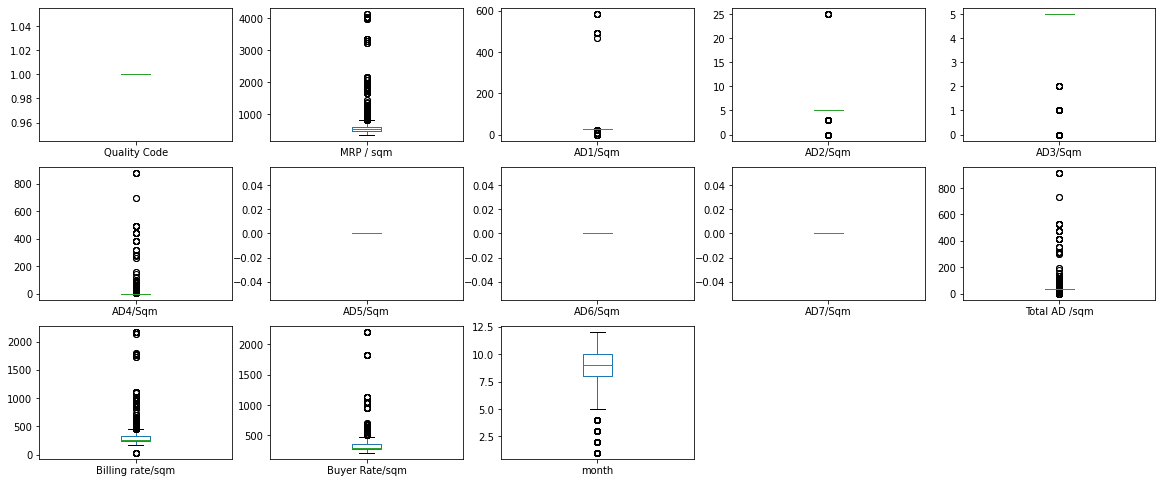

In [263]:
df.plot(kind='box', subplots=True, layout=(7,5), sharex=False, sharey=False, figsize=(20,20) )
plt.show()

**Dropping unnecessary column**

In [ ]:
df.drop(["Item Classification"], axis = 1, inplace = True)
df.drop(["Customer code"], axis = 1, inplace = True)


In [281]:
df.drop(["FY"], axis = 1, inplace = True)


**Convert categorical variables to numeric**

In [282]:
colname=[]
for x in df.columns:
    if df[x].dtype=='object':
        colname.append(x)
colname

['Value',
 'Item Cat. Code',
 'Customer type',
 'Sales Type',
 'Sales Type.1',
 'MRP / box ',
 'Ship to city',
 'Category',
 'Review zone',
 'Category 2',
 ' Re territory']

In [274]:
df["Wall/Floor "].unique()

array([0, 1])

In [286]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['Value', 'Item Cat. Code', 'Customer type', 'Sales Type',
       'Sales Type.1', 'MRP / box ', 'Ship to city', 'Category', 'Review zone',
       'Category 2', ' Re territory'],
      dtype='object')


In [287]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17429 entries, 0 to 17497
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item Code          17429 non-null  int64  
 1   State              17429 non-null  int64  
 2   Item Description   17429 non-null  int64  
 3   ERP Size           17429 non-null  int64  
 4   Wall/Floor         17429 non-null  int64  
 5   Sticker Body Type  17429 non-null  int64  
 6   Value              17429 non-null  int64  
 7   Item Cat. Code     17429 non-null  int64  
 8   Quality Code       17429 non-null  float64
 9   Customer type      17429 non-null  int64  
 10  Sales Type         17429 non-null  int64  
 11  Sales Type.1       17429 non-null  int64  
 12  MRP / box          17429 non-null  int64  
 13  MRP / sqm          17429 non-null  float64
 14  AD1/Sqm            17429 non-null  float64
 15  AD2/Sqm            17429 non-null  float64
 16  AD3/Sqm            174

In [288]:
#splitting in train and test
df.head()

,Item Code,State,Item Description,ERP Size,Wall/Floor,Sticker Body Type,Value,Item Cat. Code,Quality Code,Customer type,Sales Type,Sales Type.1,MRP / box,MRP / sqm,AD1/Sqm,AD2/Sqm,AD3/Sqm,AD4/Sqm,AD5/Sqm,AD6/Sqm,AD7/Sqm,Total AD /sqm,Billing rate/sqm,Buyer Rate/sqm,Ship to city,Category,Review zone,Category 2,Re territory,month
0,391,3,438,7,0,1,645,0,1.0,102,1,3,49,958.33,25.0,5.0,5.0,0.0,0.0,0.0,0.0,35.0,403.0,438.0,110,1,1,2,22,6.0
1,394,3,438,7,0,1,645,0,1.0,102,1,3,49,958.33,25.0,5.0,5.0,0.0,0.0,0.0,0.0,35.0,403.0,438.0,110,1,1,2,22,6.0
2,396,3,439,7,0,1,645,0,1.0,102,1,3,49,958.33,25.0,5.0,5.0,0.0,0.0,0.0,0.0,35.0,403.0,438.0,110,1,1,2,22,6.0
3,392,3,447,7,0,1,564,0,1.0,102,1,3,49,958.33,25.0,5.0,5.0,0.0,0.0,0.0,0.0,35.0,403.0,438.0,110,1,1,2,22,6.0
4,394,4,453,7,0,1,2629,0,1.0,250,1,3,29,826.39,25.0,5.0,5.0,0.0,0.0,0.0,0.0,35.0,403.0,438.0,267,1,1,2,26,6.0


In [290]:
Y = df['MRP / sqm']
df.drop(['MRP / sqm'], axis = 1, inplace  =True)
X = df

In [293]:
X.shape, Y.shape

((17429, 29), (17429,))

In [294]:
#splitting in train and test
import sklearn
from sklearn.model_selection import train_test_split

In [295]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3 , random_state=111)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12200, 29)
(12200,)
(5229, 29)
(5229,)


In [303]:
#XGBoost

from xgboost import XGBRegressor
# from xgboost.sklearn import XGBRegressor
from sklearn import metrics
# from ml_metrics import rmse

# Define the model
model = XGBRegressor(n_estimators=350,max_depth=15,learning_rate=.1,random_state=1,
                     n_jobs=10, subsample=1,min_child_weight=0.6) 

# Fit the model
model.fit(X_train, y_train)

# Get validation predictions and MAE
preds_valid = model.predict(X_test)


print("RMSE (Your appraoch):")
# print(rmse(y_valid, preds_valid))
print(np.sqrt(metrics.mean_squared_error(np.log(y_test), preds_valid)))

[14:32:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE (Your appraoch):
621.5977186691027


In [304]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
# from sklearn.metrics import r2_score

# Define the model
model = LinearRegression()
# Fit the model
model.fit(X_train, y_train)
# Get validation predictions and MAE
preds_valid = pd.Series(model.predict(X_test))

In [307]:
# print('Coefficients: \n', model.coef_)
print("MAE: ", metrics.mean_absolute_error(y_test, preds_valid))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, preds_valid))
# print("RMSE:", np.sqrt(metrics.mean_squared_error(y_valid, preds_valid)))

print('Variance score (r2): %.2f' % metrics.r2_score(y_test, preds_valid))
# print("r2 score:", metrics.r2_score(y_valid, preds_valid))

MAE:  19.762046818383944
Mean squared error: 943.46
Variance score (r2): 0.98


In [ ]:
test = "/content/drive/MyDrive/TEST.csv"


In [ ]:
df = pd.read_csv(test , header = 0, error_bad_lines=False, index_col=False)
df.head()